In [80]:
from sklearn.naive_bayes import CategoricalNB, GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from mixed_naive_bayes import MixedNB

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
# read in data
data = pd.read_csv('../Data/Data Cleaning and Feature Eng/recent-grads-new-features.csv')

# encode categorical column to numerical value
le = LabelEncoder()
data["Major_category_coded"] = le.fit_transform(data["Major_category"])

# encode predicted class variable as numerical label
le = LabelEncoder()
data["Median_category_coded"] = le.fit_transform(data["Median_category"])

data.head()

,Unnamed: 0,Rank,Major_code,Major,Major_category,Total,Sample_size,Men,Women,ShareWomen,...,Major_category_Health,Major_category_Humanities & Liberal Arts,Major_category_Industrial Arts & Consumer Services,Major_category_Interdisciplinary,Major_category_Law & Public Policy,Major_category_Physical Sciences,Major_category_Psychology & Social Work,Major_category_Social Science,Major_category_coded,Median_category_coded
0,0,1,2419,PETROLEUM ENGINEERING,Engineering,2339,36,2057,282,0.120564,...,0,0,0,0,0,0,0,0,7,0
1,1,2,2416,MINING AND MINERAL ENGINEERING,Engineering,756,7,679,77,0.101852,...,0,0,0,0,0,0,0,0,7,6
2,2,3,2415,METALLURGICAL ENGINEERING,Engineering,856,3,725,131,0.153037,...,0,0,0,0,0,0,0,0,7,6
3,3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,Engineering,1258,16,1123,135,0.107313,...,0,0,0,0,0,0,0,0,7,6
4,4,5,2405,CHEMICAL ENGINEERING,Engineering,32260,289,21239,11021,0.341631,...,0,0,0,0,0,0,0,0,7,5


In [6]:
# split into train and test set
train, test = train_test_split(data,test_size=0.2, random_state=42)

## Experiment 1: All features

In [8]:
features = ['Major_category_coded', 'Total',
       'Sample_size', 'Men', 'Women', 'ShareWomen', 'Employed', 'Full_time',
       'Part_time', 'Full_time_year_round', 'Unemployed', 'Unemployment_rate',
       'College_jobs', 'Non_college_jobs',
       'Low_wage_jobs', 'Num_majors', 'Percent_sample_size',
       'Percent_employed', 'Percent_unemployed', 'Percent_college',
       'Percent_non_college', 'Percent_low_wage', 'Percent_full_time']

In [9]:
X_train = train[features]
y_train = train['Median_category_coded']

X_test = test[features]
y_test = test['Median_category_coded']

In [15]:
## Gaussian

# initialize Gaussian NB model
naive_bayes = GaussianNB()

# fit gaussian Naive Bayes model on training set
naive_bayes.fit(X_train, y_train)

# predict class variable on test set
predictions = naive_bayes.predict(X_test)

# generate accuracy score
naive_bayes.score(X_test, y_test)

0.34285714285714286

In [ ]:
## Categorical NB was not performed for Experiment 1

In [21]:
## Mixed Naive Bayes

# initalize mixed Naive Bayes model with column 0 (Major_category_coded) designated as categorical feature
mixedNB = MixedNB(categorical_features=[0])

# fit mixed Naive Bayes model on training set
mixedNB.fit(X_train, y_train)

# predict class variable on test set
mixedNB_predictions = mixedNB.predict(X_test)

# generate accuracy score
mixedNB.score(X_test, y_test)


0.37142857142857144

In [23]:
# GridSearchCV was not performed in the intial experiment as parameter optimization was not part of this experiment


In [ ]:
## Experiment 2: Reduced feature set

In [44]:
features = ['Major_category_coded',
            'Num_majors',
            'Percent_full_time',
            'Percent_college',
            'Percent_non_college',
            'Percent_sample_size',
            'ShareWomen',
            'Unemployment_rate']

In [45]:
X_train = train[features]
y_train = train['Median_category_coded']

X_test = test[features]
y_test = test['Median_category_coded']

In [64]:
## Gaussian

# initialize Gaussian NB model
naive_bayes = GaussianNB()

# fit gaussian Naive Bayes model on training set
naive_bayes.fit(X_train, y_train)

# predict class variable on test set
predictions = naive_bayes.predict(X_test)

# generate accuracy score
naive_bayes.score(X_test, y_test)

0.6857142857142857

In [60]:
### Categorical

naive_bayes = CategoricalNB()
# fit categorical Naive Bayes model on training set
naive_bayes.fit(X_train, y_train)
# predict class variable on test set
predictions = naive_bayes.predict(X_test)
# generate accuracy score
naive_bayes.score(X_test, y_test)

0.5714285714285714

In [48]:
## Mixed Naive Bayes

# initalize mixed Naive Bayes model with column 0 (Major_category_coded) designated as categorical feature
mixedNB = MixedNB(categorical_features=[0])

# fit mixed Naive Bayes model on training set
mixedNB.fit(X_train, y_train)

# predict class variable on test set
mixedNB_predictions = mixedNB.predict(X_test)

# generate accuracy score
mixedNB.score(X_test, y_test)


0.4857142857142857

In [ ]:
# GridSearchCV was not performed in the intial experiment as parameter optimization was not part of this experiment


In [ ]:
## Experiment 3: Parameter tuning

In [ ]:
# The same feature set was used as in Experiment 2

In [58]:
# Manual tuning of GaussianNB did not yield any improvements

0.6857142857142857

In [86]:
# Code used to test different parameter values with GaussianNB and CategoricalNB

GAUSSIAN_PARAMS = [1e-20, 1e-10, 1e-5, 1, 10, 100, 1000]
CATEGORICAL_PARAMS = list(range(1, 20, 2))
ACCURACY_SCORES_GAUSSIAN = []
ACCURACY_SCORES_CATEGORICAL = []

for param in GAUSSIAN_PARAMS:
    # initialize Gaussian NB model
    naive_bayes = GaussianNB(var_smoothing=param)

    # fit gaussian Naive Bayes model on training set
    naive_bayes.fit(X_train, y_train)

    # predict class variable on test set
    predictions = naive_bayes.predict(X_test)

    # generate accuracy score
    score = naive_bayes.score(X_test, y_test)
    print("Gaussian Test Accuracy var_smoothing=", param, "----> ", score )

    ACCURACY_SCORES_GAUSSIAN.append(score)
    
for param in CATEGORICAL_PARAMS:
    
    naive_bayes = CategoricalNB(alpha=param)
    # fit categorical Naive Bayes model on training set
    naive_bayes.fit(X_train, y_train)
    # predict class variable on test set
    predictions = naive_bayes.predict(X_test)
    # generate accuracy score
    score = naive_bayes.score(X_test, y_test)

    print("CategoricalNB Test Accuracy alpha=", param, " ----> ", score )
    ACCURACY_SCORES_CATEGORICAL.append(score)

Gaussian Test Accuracy var_smoothing= 1e-20 ---->  0.5142857142857142
Gaussian Test Accuracy var_smoothing= 1e-10 ---->  0.5714285714285714
Gaussian Test Accuracy var_smoothing= 1e-05 ---->  0.5428571428571428
Gaussian Test Accuracy var_smoothing= 1 ---->  0.5714285714285714
Gaussian Test Accuracy var_smoothing= 10 ---->  0.5428571428571428
Gaussian Test Accuracy var_smoothing= 100 ---->  0.5428571428571428
Gaussian Test Accuracy var_smoothing= 1000 ---->  0.5428571428571428
CategoricalNB Test Accuracy alpha= 1  ---->  0.5714285714285714
CategoricalNB Test Accuracy alpha= 3  ---->  0.6
CategoricalNB Test Accuracy alpha= 5  ---->  0.4857142857142857
CategoricalNB Test Accuracy alpha= 7  ---->  0.4857142857142857
CategoricalNB Test Accuracy alpha= 9  ---->  0.4857142857142857
CategoricalNB Test Accuracy alpha= 11  ---->  0.4857142857142857
CategoricalNB Test Accuracy alpha= 13  ---->  0.4857142857142857
CategoricalNB Test Accuracy alpha= 15  ---->  0.4857142857142857
CategoricalNB Test A

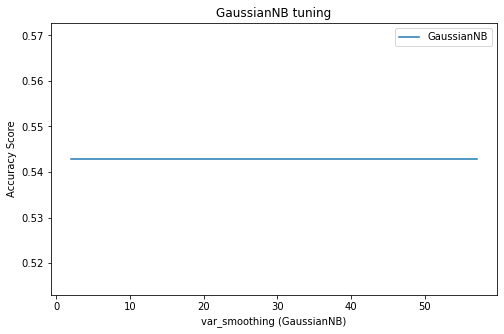

In [83]:
# generate tuning plot

plt.figure(figsize=(8, 5))  
plt.plot(GAUSSIAN_PARAMS, ACCURACY_SCORES_GAUSSIAN, label="GaussianNB")
plt.xlabel("var_smoothing (GaussianNB)")
plt.ylabel("Accuracy Score")
plt.title("GaussianNB tuning")
plt.legend(loc="upper right")

plt.show()

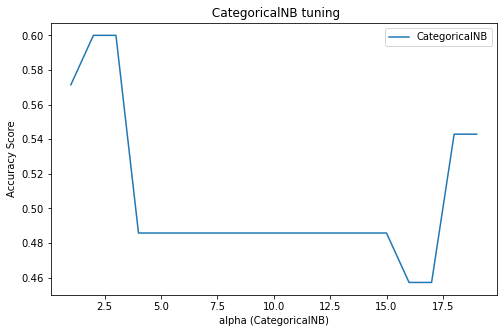

In [82]:
# generate tuning plot

plt.figure(figsize=(8, 5))  
plt.plot(CATEGORICAL_PARAMS, ACCURACY_SCORES_CATEGORICAL, label="CategoricalNB")
plt.xlabel("alpha (CategoricalNB)")
plt.ylabel("Accuracy Score")
plt.title(" CategoricalNB tuning")
plt.legend(loc="upper right")

plt.show()

In [ ]:
## MixedNB does not have parameters for tuning

In [53]:
## GridSearchCV - GaussianNB

param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

grid_search_cv = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
grid_search_cv.fit(X_train, y_train)

y_pred = nbModel_grid.predict(X_test)
grid_search_cv.score(X_test, y_test)
print("Best estimator: ", grid_search_cv.best_estimator_)
grid_search_cv.score(X_test, y_test)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


/home/awjian/.local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,


GaussianNB(var_smoothing=0.657933224657568)


0.6857142857142857

In [67]:
## GridSearchCV - CategoricalNB

param_grid_nb = {
    'alpha': list(range(0,50))
}

grid_search_cv = GridSearchCV(estimator=CategoricalNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
grid_search_cv.fit(X_train, y_train)

y_pred = nbModel_grid.predict(X_test)
grid_search_cv.score(X_test, y_test)

print("Best estimator: ", grid_search_cv.best_estimator_)
grid_search_cv.score(X_test, y_test)


Fitting 10 folds for each of 50 candidates, totalling 500 fits


/home/awjian/.local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,


Best estimator:  CategoricalNB(alpha=8)


0.4857142857142857